In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("engine_perfomence.csv")
df

,Engine_Speed_RPM,Fuel_Efficiency
0,500.000000,-2458.934731
1,513.026052,-2433.443544
2,526.052104,-2409.403597
3,539.078156,-2382.461235
4,552.104208,-2356.380454
...,...,...
495,6947.895792,-6193.962316
496,6960.921844,-6235.515689
497,6973.947896,-6276.468124
498,6986.973948,-6318.931002


In [3]:
x=df[["Engine_Speed_RPM"]]
y=df["Fuel_Efficiency"]
y

0     -2458.934731
1     -2433.443544
2     -2409.403597
3     -2382.461235
4     -2356.380454
          ...     
495   -6193.962316
496   -6235.515689
497   -6276.468124
498   -6318.931002
499   -6360.527214
Name: Fuel_Efficiency, Length: 500, dtype: float64

In [6]:
poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(x)
poly_feature


array([[1.00000000e+00, 5.00000000e+02, 2.50000000e+05],
       [1.00000000e+00, 5.13026052e+02, 2.63195730e+05],
       [1.00000000e+00, 5.26052104e+02, 2.76730816e+05],
       ...,
       [1.00000000e+00, 6.97394790e+03, 4.86359493e+07],
       [1.00000000e+00, 6.98697395e+03, 4.88178049e+07],
       [1.00000000e+00, 7.00000000e+03, 4.90000000e+07]], shape=(500, 3))

In [5]:
x_train,x_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.2,random_state=42)


In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
y_pred=model.predict(x_test)
y_pred

array([-1900.225163  ,  -919.79739456, -2210.05912712,   -52.4729666 ,
        -484.60267561, -2731.52150971, -2284.81707236,  -273.06013221,
       -1002.20683993, -4480.47441847, -2230.91853609,    39.75256288,
       -3070.46133664,  -750.4418802 , -2136.52285676, -2569.38164551,
       -6194.35591222, -1739.41955521, -1004.86583661, -3128.85169093,
       -5990.35046984, -6030.88007501,  -486.48970552, -1787.1666281 ,
        -871.98062717, -4874.03953895, -6276.90828075,    15.34040789,
        -521.01714415, -1330.02434549, -5398.69539065, -1368.86790176,
       -4136.94081887,    15.7478348 , -2408.05421171, -1310.80617984,
       -3158.25048056,  -968.83583682,    20.24855092, -1088.00982662,
       -2464.00323577,  -624.09502632, -5789.73856879,    36.79487153,
       -1674.0921146 ,  -856.31318801, -2459.88607962, -2181.53001794,
       -3337.49379303, -1919.59869626,  -936.00780033,    33.36562467,
        -211.84782822, -3187.78501184,    39.96689712, -1232.35317129,
      

In [11]:
mse=mean_squared_error(y_pred,y_test)
mse
rmse=np.sqrt(mse)
rmse
score=r2_score(y_pred,y_test)
score

0.9999998226524639

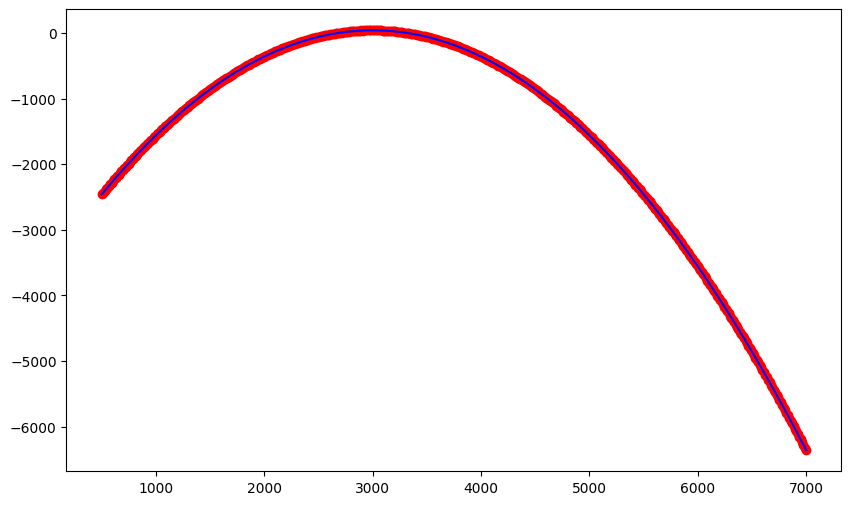

In [17]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.plot(x,model.predict(poly.transform(x)),color="blue")
plt.plot()
plt.show()

In [18]:
newdata=np.array([[500.000000]])
task=poly.fit_transform(newdata)
pre=model.predict(task)
pre

array([-2459.88607962])

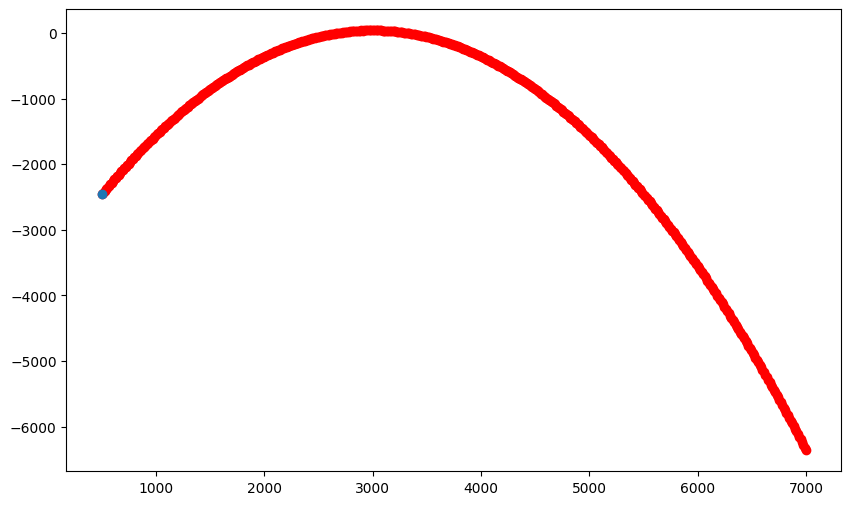

In [27]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(newdata,pre)
plt.show()
